In [1]:
from ROOT import TFile, TCanvas, gDirectory, TRatioPlot, gStyle, gPad, TLegend

Welcome to JupyROOT 6.26/08


In [2]:
path_vtxsigma = "kinfit_kskpi_run049912.root" # 1
path_no_vtxsigma = "../KsKpi_sim_hypo_vertex_fit/kinfit_kskpi_run049912.root" # 0]
fl0 = TFile.Open(path_no_vtxsigma, 'read')
fl1 = TFile.Open(path_vtxsigma, 'read')

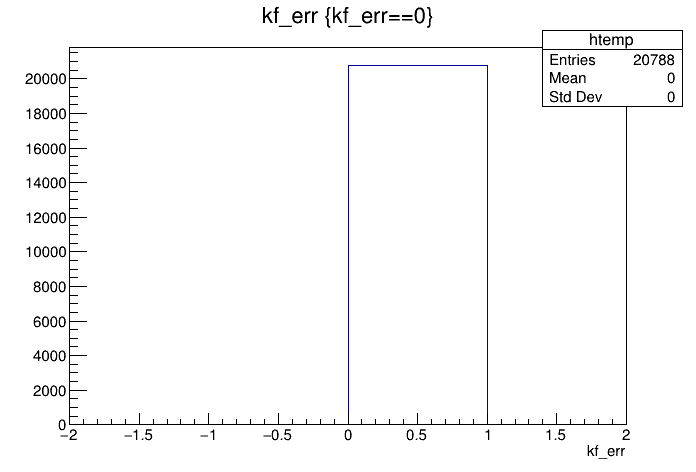

In [3]:
cnv = TCanvas()
fl0.kf_data.Draw("kf_err", "kf_err==0")
cnv.Draw()

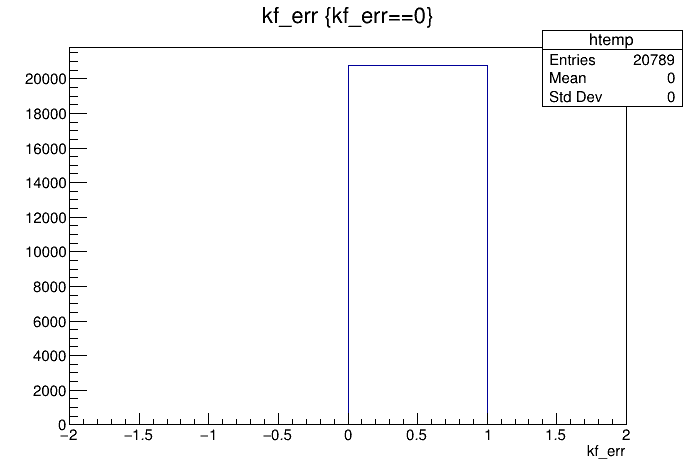

In [4]:
cnv = TCanvas()
fl1.kf_data.Draw("kf_err", "kf_err==0")
cnv.Draw()

 FCN=114.379 FROM MIGRAD    STATUS=CONVERGED      15 CALLS          16 TOTAL
                     EDM=1.86873e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.00628e+00   1.14098e-02   5.98429e-05  -1.69437e-03


Info in <TCanvas::SaveAs>: ROOT file kskpi_vtxsigma_mks_comp.root has been created


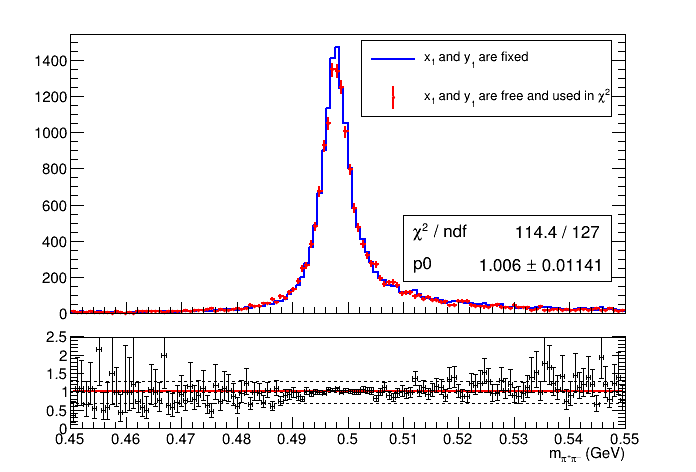

In [5]:
gStyle.SetOptFit(1);
cnv0 = TCanvas()
fl0.kf_data.Draw("kf_mks>>kf_mks0(128,0.45,0.55)", "kf_err==0", "goff")
h0 = gDirectory.Get("kf_mks0")
h0.GetXaxis().SetTitle("m_{#pi^{+}#pi^{#minus}} (GeV)")
h0.SetTitle("")
h0.SetStats(False)
h0.SetLineColor(4)
h0.SetLineWidth(2)
fl1.kf_data.Draw("kf_mks>>kf_mks1(128,0.45,0.55)", "kf_err==0", "goff")
h1 = gDirectory.Get("kf_mks1")
h1.SetTitle("")
h1.SetStats(False)
h1.SetLineColor(2)
# h1.SetLineStyle(9)
h1.SetLineWidth(2)
h1.SetMarkerStyle(20)
h1.SetMarkerSize(0.4)
h1.SetMarkerColor(2)
h1.Sumw2()
mks_ratio = TRatioPlot(h0, h1)
cnv0.SetTicks(0, 1)
mks_ratio.GetLowYaxis().SetNdivisions(505)
mks_ratio.Draw()
mks_ratio.GetLowerRefGraph().SetMaximum(2.5)
mks_ratio.GetLowerRefGraph().SetMinimum(0)
mks_ratio.GetLowerRefGraph().Fit("pol0")
gPad.Modified()
gPad.Update()
mks_ratio.GetUpperPad().cd()
st = mks_ratio.GetLowerRefGraph().FindObject("stats").Clone()
st.Draw()
mks_ratio.GetLowerRefGraph().SetStats(0)
st.SetX1NDC(0.58)
st.SetX2NDC(0.88)
st.SetY1NDC(0.15)
st.SetY2NDC(0.35)
leg = TLegend(0.52,0.65,0.88,0.88)
leg.AddEntry("kf_mks0","x_{1} and y_{1} are fixed","l")
leg.AddEntry("kf_mks1","x_{1} and y_{1} are free and used in #chi^{2}","ep")
leg.Draw()
cnv0.Draw()
cnv0.SaveAs("kskpi_vtxsigma_mks_comp.root")

 FCN=252.463 FROM MIGRAD    STATUS=CONVERGED      11 CALLS          12 TOTAL
                     EDM=1.87978e-22    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  32.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.25664e-01   7.42051e-03   1.19589e-13   2.44385e-09


Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 1 points have been skipped


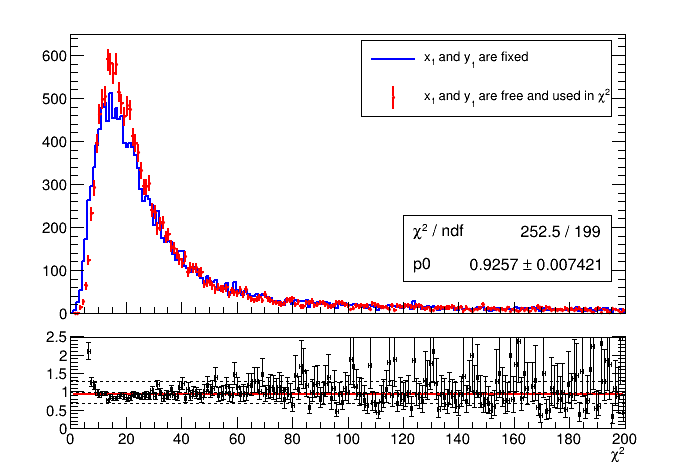

In [12]:
gStyle.SetOptFit(1);
cnv0 = TCanvas()
fl0.kf_data.Draw("kf_chi2>>kf_chi2_0(201,0,200)", "kf_err==0", "goff")
h0 = gDirectory.Get("kf_chi2_0")
h0.GetXaxis().SetTitle("#chi^{2}")
h0.SetTitle("")
h0.SetStats(False)
h0.SetLineColor(4)
h0.SetLineWidth(2)
fl1.kf_data.Draw("kf_chi2>>kf_chi2_1(201,0,200)", "kf_err==0", "goff")
h1 = gDirectory.Get("kf_chi2_1")
h1.SetTitle("")
h1.SetStats(False)
h1.SetLineColor(2)
# h1.SetLineStyle(9)
h1.SetLineWidth(2)
h1.SetMarkerStyle(20)
h1.SetMarkerSize(0.4)
h1.SetMarkerColor(2)
h1.Sumw2()
h0.SetMaximum(650)
h1.SetMaximum(650)
mks_ratio = TRatioPlot(h0, h1)
cnv0.SetTicks(0, 1)
mks_ratio.GetLowYaxis().SetNdivisions(505)
mks_ratio.Draw()
mks_ratio.GetLowerRefGraph().SetMaximum(2.5)
mks_ratio.GetLowerRefGraph().SetMinimum(0)
mks_ratio.GetLowerRefGraph().Fit("pol0")
gPad.Modified()
gPad.Update()
mks_ratio.GetUpperPad().cd()
st = mks_ratio.GetLowerRefGraph().FindObject("stats").Clone()
st.Draw()
mks_ratio.GetLowerRefGraph().SetStats(0)
st.SetX1NDC(0.58)
st.SetX2NDC(0.88)
st.SetY1NDC(0.15)
st.SetY2NDC(0.35)
leg = TLegend(0.52,0.65,0.88,0.88)
leg.AddEntry("kf_chi2_0","x_{1} and y_{1} are fixed","l")
leg.AddEntry("kf_chi2_1","x_{1} and y_{1} are free and used in #chi^{2}","ep")
leg.Draw()
cnv0.Draw()